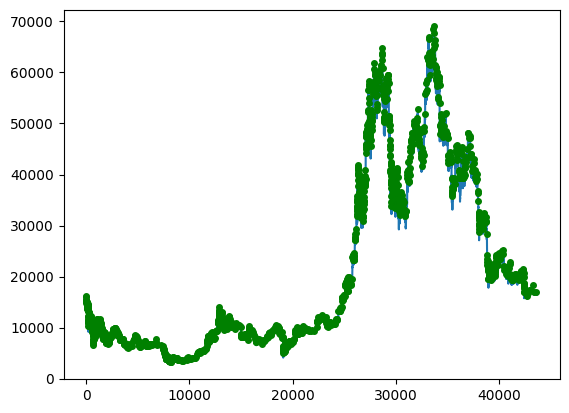

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

def directional_change(close: np.array, high: np.array, low: np.array, sigma: float):
    
    up_zig = True # Last extreme is a bottom. Next is a top. 
    tmp_max = high[0]
    tmp_min = low[0]
    tmp_max_i = 0
    tmp_min_i = 0

    tops = []
    bottoms = []

    for i in range(len(close)):
        if up_zig: # Last extreme is a bottom
            if high[i] > tmp_max:
                # New high, update 
                tmp_max = high[i]
                tmp_max_i = i
            elif close[i] < tmp_max - tmp_max * sigma: 
                # Price retraced by sigma %. Top confirmed, record it
                # top[0] = confirmation index
                # top[1] = index of top
                # top[2] = price of top
                top = [i, tmp_max_i, tmp_max]
                tops.append(top)

                # Setup for next bottom
                up_zig = False
                tmp_min = low[i]
                tmp_min_i = i
        else: # Last extreme is a top
            if low[i] < tmp_min:
                # New low, update 
                tmp_min = low[i]
                tmp_min_i = i
            elif close[i] > tmp_min + tmp_min * sigma: 
                # Price retraced by sigma %. Bottom confirmed, record it
                # bottom[0] = confirmation index
                # bottom[1] = index of bottom
                # bottom[2] = price of bottom
                bottom = [i, tmp_min_i, tmp_min]
                bottoms.append(bottom)

                # Setup for next top
                up_zig = True
                tmp_max = high[i]
                tmp_max_i = i

    return tops, bottoms

def get_extremes(ohlc: pd.DataFrame, sigma: float):
    tops, bottoms = directional_change(ohlc['close'], ohlc['high'], ohlc['low'], sigma)
    tops = pd.DataFrame(tops, columns=['conf_i', 'ext_i', 'ext_p'])
    bottoms = pd.DataFrame(bottoms, columns=['conf_i', 'ext_i', 'ext_p'])
    tops['type'] = 1
    bottoms['type'] = -1
    extremes = pd.concat([tops, bottoms])
    extremes = extremes.set_index('conf_i')
    extremes = extremes.sort_index()
    return extremes

# ...existing code...

if __name__ == '__main__':
    data = pd.read_csv('BTCUSDT3600.csv')
    data['date'] = data['date'].astype('datetime64[s]')
    data = data.set_index('date')
    tops, bottoms = directional_change(data['close'].to_numpy(), data['high'].to_numpy(), data['low'].to_numpy(), 0.02)

    pd.Series(data['close'].to_numpy()).plot()
    idx = data.index
    for top in tops:
        plt.plot(top[1], top[2], marker='o', color='green', markersize=4)

    plt.show()
# ...existing code...